In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import random
from sklearn.decomposition import PCA

In [2]:
from keras.datasets import cifar10

In [3]:
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

In [4]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

In [5]:
#Model
#encoder
input_img = tf.keras.layers.Input(shape=(32, 32, 3))

encoder = tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',kernel_initializer='he_normal')(input_img)
encoder = tf.keras.layers.Activation('relu')(encoder)
encoder = tf.keras.layers.BatchNormalization()(encoder)

encoder = tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.008))(encoder)
encoder = tf.keras.layers.Activation('relu')(encoder)
encoder = tf.keras.layers.BatchNormalization()(encoder)

encoder = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2)(encoder)
encoder = tf.keras.layers.Dropout(0.5)(encoder)

encoder = tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.008))(encoder)
encoder = tf.keras.layers.Activation('relu')(encoder)
encoder = tf.keras.layers.BatchNormalization()(encoder)

encoder = tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',kernel_regularizer=tf.keras.regularizers.l2(0.008))(encoder)
encoder = tf.keras.layers.Activation('relu')(encoder)
encoder = tf.keras.layers.BatchNormalization()(encoder)

encoder = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2)(encoder)
encoder = tf.keras.layers.Dropout(0.5)(encoder)

encoder = tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',kernel_initializer='he_uniform')(encoder)
encoder = tf.keras.layers.Activation('relu')(encoder)
encoder = tf.keras.layers.BatchNormalization()(encoder)

encoder = tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',kernel_initializer='he_uniform')(encoder)
encoder = tf.keras.layers.Activation('relu')(encoder)
encoder = tf.keras.layers.BatchNormalization()(encoder)

encoder = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2)(encoder)
encoder = tf.keras.layers.Dropout(0.5)(encoder)

encoder = tf.keras.layers.Flatten()(encoder)
encoder = tf.keras.layers.Dense(256,activation='relu',kernel_initializer='he_uniform')(encoder)
encoder_out = tf.keras.layers.Dense(256,activation='relu',kernel_initializer='he_uniform')(encoder)

#decoder
decoder_mul = tf.keras.layers.Dense(4*4*128)(encoder_out)
decoder_reshape = tf.keras.layers.Reshape((4,4,128))(decoder_mul)
decoder = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=(3,3), strides=2, activation='relu', padding='same')(decoder_reshape)
decoder = tf.keras.layers.BatchNormalization()(decoder)
decoder = tf.keras.layers.Dropout(0.5)(decoder)
decoder = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3,3), strides=2, activation='relu', padding='same')(decoder)
decoder = tf.keras.layers.BatchNormalization()(decoder)
decoder = tf.keras.layers.Dropout(0.5)(decoder)
decoder = tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(3,3), strides=2, activation='relu', padding='same')(decoder)
decoder = tf.keras.layers.BatchNormalization()(decoder)
decoder = tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=(3,3), strides=1, activation=None, padding='same')(decoder)
decoder = tf.keras.layers.Activation('sigmoid')(decoder)

In [6]:
autoencoder = tf.keras.models.Model(input_img, decoder)
encoder = tf.keras.models.Model(input_img, encoder)
encoded_input = tf.keras.layers.Input(shape=(4, 4, 128))
decoder_layer = autoencoder.layers[-1]
decoder = tf.keras.models.Model(encoded_input,decoder_layer(encoded_input))

In [7]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                             

In [8]:
autoencoder.compile(loss='mean_squared_error', optimizer='Adam')
history = autoencoder.fit(X_train,X_train,validation_data=(X_test, X_test),batch_size=512,epochs=30)

Epoch 1/30
98/98 [==============================] - 15s 106ms/step - loss: 1.0632 - val_loss: 0.2997
Epoch 2/30
98/98 [==============================] - 8s 86ms/step - loss: 0.1245 - val_loss: 0.1487
Epoch 3/30
98/98 [==============================] - 9s 89ms/step - loss: 0.0318 - val_loss: 0.0804
Epoch 4/30
98/98 [==============================] - 8s 86ms/step - loss: 0.0225 - val_loss: 0.0711
Epoch 5/30
98/98 [==============================] - 8s 86ms/step - loss: 0.0207 - val_loss: 0.0485
Epoch 6/30
98/98 [==============================] - 8s 86ms/step - loss: 0.0193 - val_loss: 0.0249
Epoch 7/30
98/98 [==============================] - 8s 86ms/step - loss: 0.0182 - val_loss: 0.0346
Epoch 8/30
98/98 [==============================] - 8s 87ms/step - loss: 0.0165 - val_loss: 0.0269
Epoch 9/30
98/98 [==============================] - 9s 92ms/step - loss: 0.0161 - val_loss: 0.0225
Epoch 10/30
98/98 [==============================] - 10s 103ms/step - loss: 0.0154 - val_loss: 0.0158
Epoch

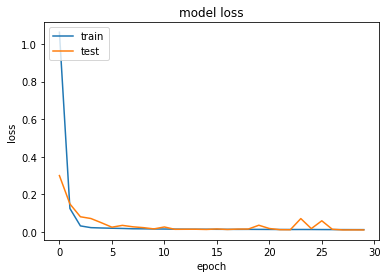

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# decoded_imgs = autoencoder.predict(X_test)

In [10]:
decoded_imgs = autoencoder.predict(X_test)

In [11]:
encoder2 = tf.keras.models.Model(input_img,encoder_out)
decoded = encoder2.predict(X_test)  

In [12]:
decoded.shape

(10000, 256)

In [13]:
#an attempt to reduce the dimensions so that k-means clustering can work better
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(decoded)

In [14]:
#K-means
km=KMeans(n_clusters=10,init='k-means++',max_iter=1000)
clustered_images = km.fit_predict(principalComponents)

In [15]:
for cluster in range(10):
    print('cluster: ', cluster)
    a = np.array(Y_test[np.where(clustered_images == cluster)])
    print(np.bincount(a[:,0]))
    print("Probable cluster label : ",np.argmax(np.bincount(a[:,0])))

cluster:  0
[277 107  76  61  50  51  30  96 343 180]
Probable cluster label :  8
cluster:  1
[111  90  48  57  18  50  35  70  78 129]
Probable cluster label :  9
cluster:  2
[194  23 285 104 355  85 248  84 141  16]
Probable cluster label :  4
cluster:  3
[ 53 213 104 160 117 188 169 134  79 121]
Probable cluster label :  1
cluster:  4
[ 18 134  54 125  32 163  65  85  49  52]
Probable cluster label :  5
cluster:  5
[77 41 31 39  4 29 22 27 11 23]
Probable cluster label :  0
cluster:  6
[ 70 113 232 222 294 204 319 232  63  81]
Probable cluster label :  6
cluster:  7
[10 37 25 50 15 46 20 24  9 13]
Probable cluster label :  3
cluster:  8
[ 72 154  42  42  28  36  12 112 182 303]
Probable cluster label :  9
cluster:  9
[118  88 103 140  87 148  80 136  45  82]
Probable cluster label :  5


In [16]:
copy=clustered_images

Class  0


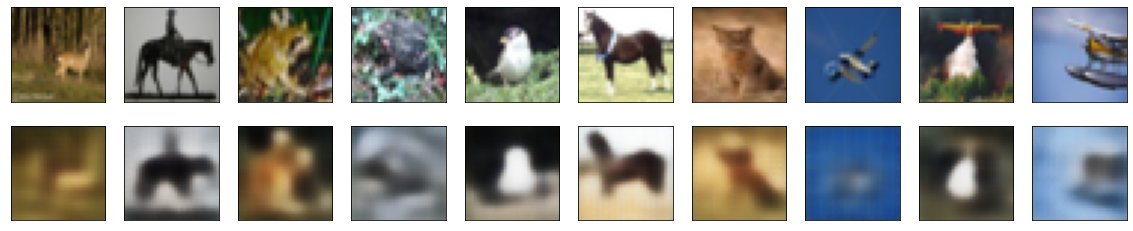

Class  1


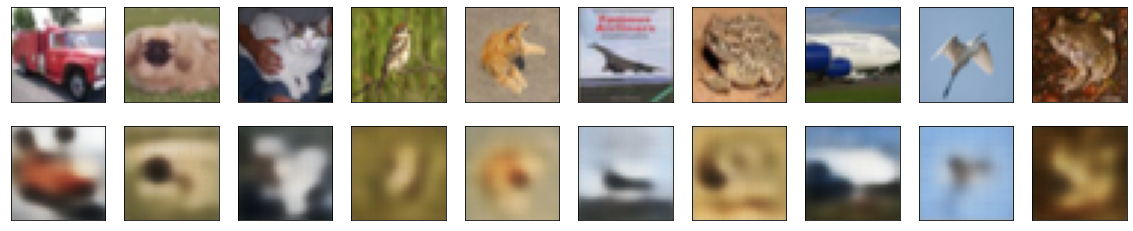

Class  2


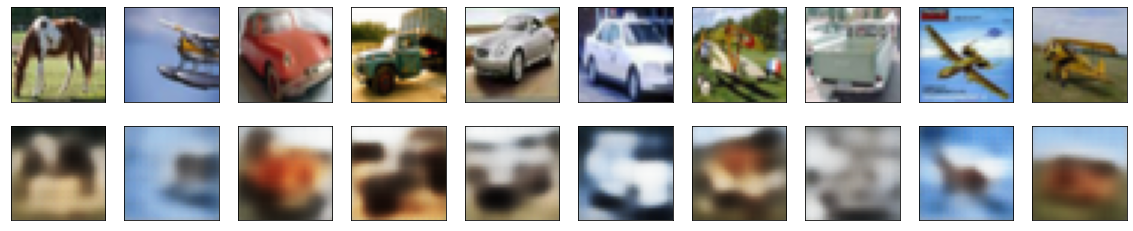

Class  3


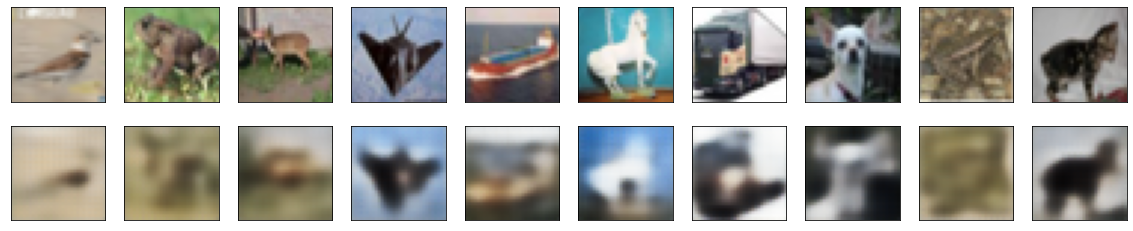

Class  4


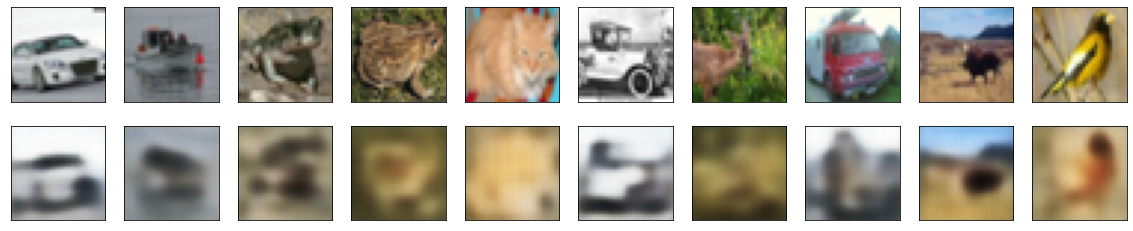

Class  5


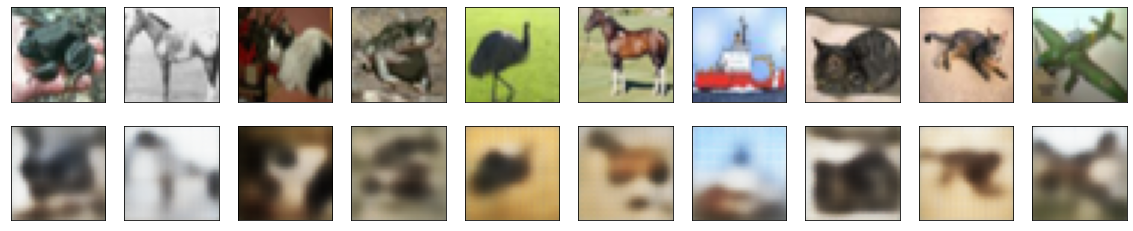

Class  6


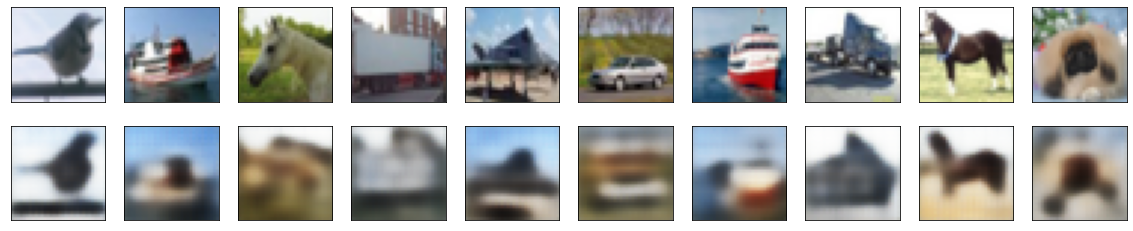

Class  7


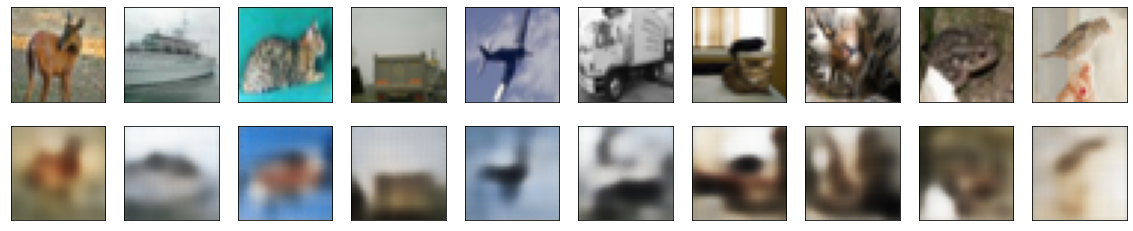

Class  8


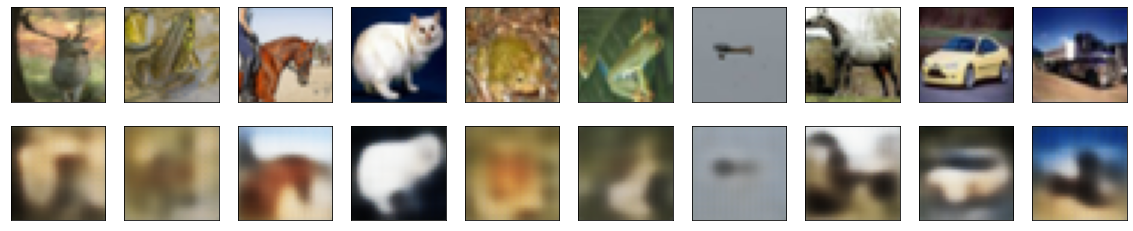

Class  9


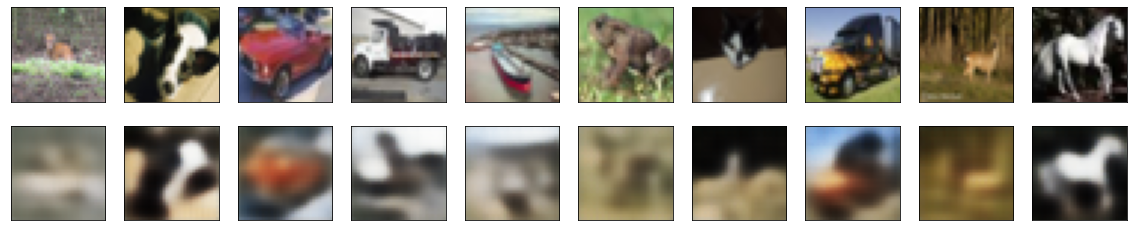

In [17]:
for i in range(10):
    n = 10
    count = 0 
    print("Class ",i)
    indices = np.array(np.where(copy==i))
    plt.figure(figsize=(20, 4))
    for j in range(n):
        # display original
        pos = random.randint(0,np.size(indices))
        ax = plt.subplot(2, n,j + 1)
        plt.imshow(X_test[pos].reshape(32,32,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, j + 1 + n)
        plt.imshow(decoded_imgs[pos].reshape(32,32,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        count+=1
    plt.show()